In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from keras.datasets import mnist

In [12]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
y_train.shape

(60000,)

In [16]:
y_test.shape

(10000,)

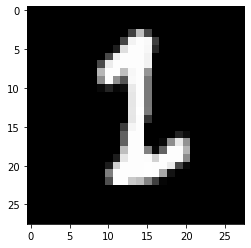

In [36]:
plt.imshow(x_train[70],cmap='gray')

In [37]:
print(y_train[70])

1


In [45]:
print(x_test[10])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  61   3  42
 118 193 118 118  61   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  14 179 245 236 242 254 254 254 254 245 235  84   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 151 254 254
 254 213 192 178 178 180 254 254 241  46   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  43 235 254 226  64  28  12   0   0   2 128 252
 255 173  17   0   0   0   0   0   0   0   0   0   0   0   0   0  56 254
 253 107   0   0   0   0   0   0   0 134 250 254  7

In [40]:
print(y_test[70])

7


In [48]:
x_test = x_test.reshape(-1,28*28)
x_train = x_train.reshape(-1,28*28)

In [49]:
x_test.shape

(10000, 784)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

In [52]:
#convert the data which has mean 0 and var 1
x_train_ = sc.fit_transform(x_train)
x_test_ = sc.fit_transform(x_test)

In [53]:
print(x_train_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
x_train_.shape

(60000, 784)

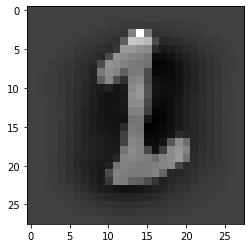

In [56]:
plt.imshow(x_train_[70].reshape(28,28),cmap='gray')

### sklearn pca

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA?

In [ ]:
pca = PCA

In [61]:
pca = PCA(n_components=2)

In [62]:
z_pca = pca.fit_transform(x_train_)

In [63]:
print(z_pca.shape)

(60000, 2)


dimension reduced from 60k, 784 to 60k,2

In [64]:
z_pca

array([[-0.92219255, -4.81401405],
       [ 8.70898667, -7.7546451 ],
       [ 2.32839941,  9.43150929],
       ...,
       [-3.77722522, -3.23026797],
       [ 1.72237548, -4.94823584],
       [-1.42724371, -6.17484224]])

In [65]:
pca.explained_variance_

array([40.48763511, 29.2416974 ])

### custom pca

In [ ]:
# compute covariance matrix

In [66]:
covar = np.dot(x_train_.T,x_train_)

In [67]:
print(covar.shape)

(784, 784)


In [68]:
covar

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
# compute eigen vector using svd (singular value decomposition)
#svd is a part of linear algebra
from numpy.linalg import svd

In [70]:
U,S,V = svd(covar)

In [71]:
U.shape

(784, 784)

In [72]:
u_red = U[:,:2]

In [73]:
u_red.shape

(784, 2)

In [ ]:
# projection of data on new axis
#  x_train_ shape is 60k,784 u_red shape is 784,2

In [74]:
z = np.dot(x_train_,u_red)

In [75]:
print(z)

[[-0.92215881 -4.81479035]
 [ 8.70897698 -7.75440302]
 [ 2.32838932  9.43133817]
 ...
 [-3.77721201 -3.23056436]
 [ 1.72236917 -4.94812525]
 [-1.42725062 -6.17538558]]


In [76]:
print(z.shape)

(60000, 2)


### Visualization

In [77]:
import pandas as pd
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [80]:
new_data = np.hstack((z,y_train.reshape(-1,1)))

In [81]:
df = pd.DataFrame(new_data,columns=['pca1','pca2','label'])

In [82]:
df.head()

,pca1,pca2,label
0,-0.922159,-4.814790,5.0
1,8.708977,-7.754403,0.0
2,2.328389,9.431338,4.0
3,-6.582173,-3.746318,1.0
4,-5.183251,3.133297,9.0


<Figure size 720x720 with 0 Axes>

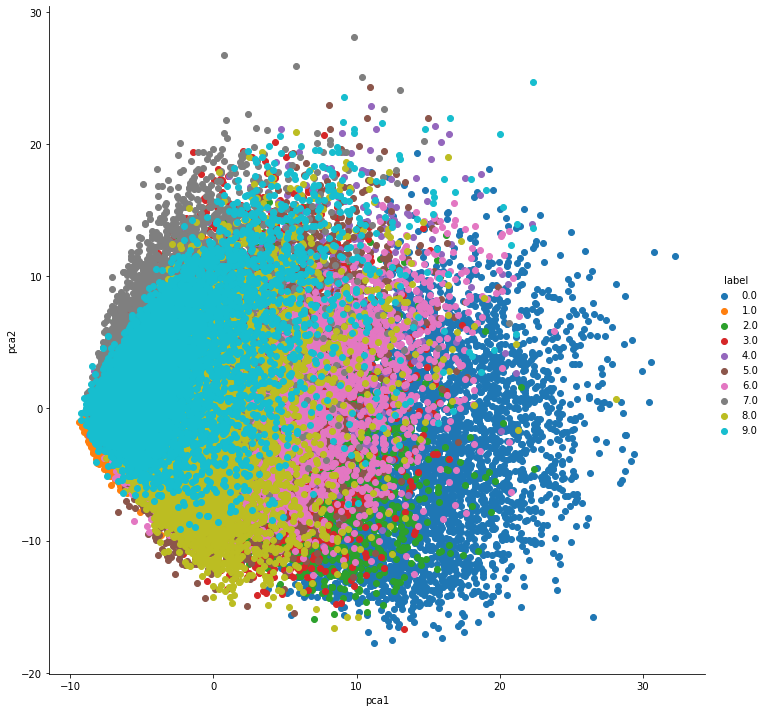

In [88]:
plt.figure(figsize=(10,10))
fg = sns.FacetGrid(df, hue='label', height=10)
fg.map(plt.scatter,'pca1','pca2')
fg.add_legend()
plt.show()

In [ ]:
# for dimensionality reducion with var around 90 or 95 per we can analyse cumulative variance

In [89]:
pca = PCA()
z_pca = pca.fit_transform(x_train_)

In [90]:
print(z_pca.shape)

(60000, 784)


In [94]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

In [95]:
cum_var_explained

array([0.05646717, 0.09724989, 0.13464369, 0.16349484, 0.18870593,
       0.21064863, 0.22988207, 0.24734006, 0.26269099, 0.27670818,
       0.29012561, 0.30216303, 0.31330873, 0.32420796, 0.33449446,
       0.34443932, 0.35380315, 0.36301361, 0.37194798, 0.3806471 ,
       0.38892074, 0.39695491, 0.40460336, 0.41202109, 0.41917402,
       0.42609249, 0.43293384, 0.43950059, 0.44581736, 0.45194656,
       0.45790911, 0.46378627, 0.46950219, 0.47512526, 0.48067208,
       0.48605627, 0.49136809, 0.49656415, 0.50164626, 0.50644631,
       0.51121087, 0.51590227, 0.52044576, 0.52495921, 0.52942885,
       0.53386268, 0.53824483, 0.54254865, 0.54681743, 0.5510539 ,
       0.55510086, 0.55909534, 0.5630699 , 0.56700811, 0.57086624,
       0.57465667, 0.57841069, 0.58211845, 0.5857679 , 0.5893609 ,
       0.59288472, 0.59636266, 0.59980677, 0.60320546, 0.606565  ,
       0.60991386, 0.6132325 , 0.61646276, 0.61962553, 0.62275797,
       0.62586528, 0.62893771, 0.63198685, 0.63501403, 0.63800

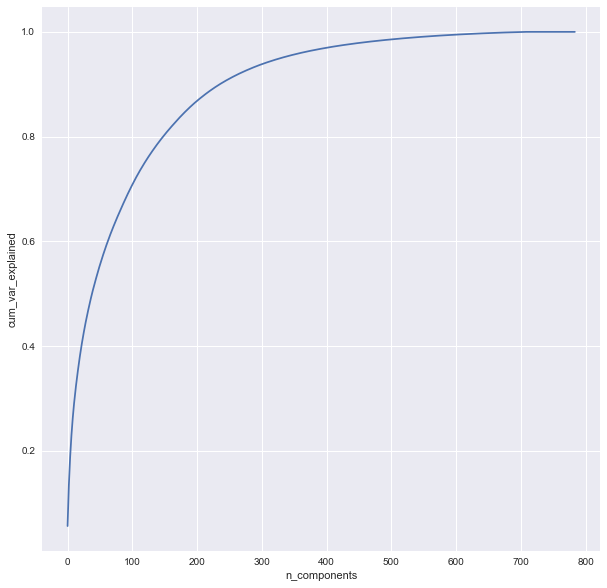

In [98]:
plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.plot(cum_var_explained)
plt.xlabel("n_components")
plt.ylabel("cum_var_explained")
plt.show()

 so in this we u need variance around 95per use n_components around 300